In [1]:
%pylab inline
import numpy as np
from sklearn import datasets 

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/numpy/core/fromnumeric.py:2641: VisibleDeprecationWarning: `rank` is deprecated; use the `ndim` attribute or function instead. To find the rank of a matrix see `numpy.linalg.matrix_rank`.
  VisibleDeprecationWarning)


In [2]:
class Linear(object):
    def __init__(self, n_in, n_out):
        self.W = np.random.randn(n_out, n_in)
        self.b = np.random.randn(n_out)
        
        self.input = np.zeros(n_in)
        self.output = np.zeros(n_out)
        
        self.gradInput = np.zeros_like(self.input)
        self.gradW = np.zeros_like(self.W)
        self.gradb = np.zeros_like(self.b)
        
    def updateOutput(self, input):
        self.input = input
        self.output = np.dot(self.W, input) + self.b
        return self.output
    
    def updateGradInput(self, gradOutput):
        self.gradInput = np.dot(self.W.T, gradOutput)
        return self.gradInput
    
    def updateGradWeight(self, gradOutput):
        self.gradW = np.outer(gradOutput, self.input)
        self.gradb = gradOutput
        self.gradWeight = self.gradW, self.gradb
        
        return self.gradWeight

In [3]:
class Sigmoid(object):
    def __init__(self, n_in):
        self.input = np.zeros(n_in)
        self.output = np.zeros(n_in)
        self.gradInput = np.zeros_like(self.input)
        
    def updateOutput(self, input):
        self.input = input
        self.output = 1.0 / (1.0 + np.exp(-input))
        return self.output
    
    def updateGradInput(self, gradOutput):
        self.gradInput = gradOutput * self.output * (1.0 - self.output)
        return self.gradInput
    
    def updateGradWeight(self, gradOutput):
        self.gradWeight = ()
        return self.gradWeight

In [4]:
class Softmax(object):
    def __init__(self, n_in):
        self.output = np.zeros(n_in)
    
    def updateOutput(self, input):
        mx = input.max()
        logsum = np.exp(-(mx - input)).sum()
        logsum = mx + log(logsum)
        self.output = input - logsum
        
        return self.output
    
    def updateGradInput(self, gradOutput):
        sm = gradOutput.sum()
        self.gradInput = gradOutput - np.exp(self.output) * sm
        return self.gradInput
    
    def updateGradWeight(self, gradOutput):
        self.gradWeight = ()
        return self.gradWeight

In [5]:
class MSELoss(object):
    def __init__(self, n_in):
        self.n_in = n_in
        self.output = 0.0
        self.input = np.zeros(n_in)
        
    def updateOutput(self, input, target):
        self.output = (1.0 / self.n_in) *np.sum((input - target)**2)
        return self.output
    
    def updateGradInput(self, input, target):
        self.gradInput = (2.0 / self.n_in) * (input - target)
        return self.gradInput

In [6]:
class NLLLoss(object):
    def __init__(self, n_in):
        self.n_in = n_in
        
    def updateOutput(self, input, target):
        self.output = -input[target]
        return self.output
    
    def updateGradInput(self, input, target):
        self.gradInput = np.zeros_like(input)
        self.gradInput[target] = -1.0
        return self.gradInput

In [7]:
class MLP(object):
    def __init__(self, n_in, n_out):
        self.modules = []
        self.input = np.zeros(n_in)
        self.output = np.zeros(n_out)
        self.gradInput = np.zeros_like(self.input)
        self.gradients = []
        
    def add(self, module):
        self.modules.append(module)
        
    def forward(self, input):
        self.input = input
        self.output = input
        for m in self.modules:
            self.output = m.updateOutput(self.output)
        return self.output
    
    def backward(self, gradOutput):
        for m in reversed(self.modules):
            self.gradients.insert(0, m.updateGradWeight(gradOutput))
            gradOutput = m.updateGradInput(gradOutput)
        return self.gradients
    
    def predict(self, input):
        out = self.forward(input).argmax()
        return out
        #if out <= 0.5:
        #    return 0
        #return 1
        
class dataBreaker(object):
    
    def __init__( self, x, y ):
        self.trainingx = np.zeros( ( 700, 2 ) )
        self.trainingy = np.zeros( 700 )
        self.validationx = np.zeros( ( 150, 2 ) )
        self.validationy = np.zeros( 150 )
        self.testx = np.zeros( ( 150, 2 ) )
        self.testy = np.zeros( 150 )
        for load in range( 1000 ):
            if( load < 700 ):
                self.trainingx[load] = x[load]
                self.trainingy[load] = y[load]
            if( load >= 700 and load < 850 ):
                self.validationx[load - 700] = x[load]
                self.validationy[load - 700] = y[load]
            if( load >= 850 ):
                self.testx[load - 850] = x[load]
                self.testy[load - 850] = y[load]
        self.trainingy = self.trainingy.astype(int)
        self.validationy = self.validationy.astype(int)
        self.testy = self.testy.astype(int)

In [8]:
model = MLP(2, 1)
model.add(Linear(2,500))
model.add(Sigmoid(500))
model.add(Linear(500,3))
model.add(Softmax(3))
criterion = NLLLoss(2)

model2 = MLP(2, 1)
model2.add(Linear(2,400))
model2.add(Sigmoid(400))
model2.add(Linear(400,3))
model2.add(Softmax(3))
criterion2 = NLLLoss(2)

/usr/local/lib/python2.7/dist-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


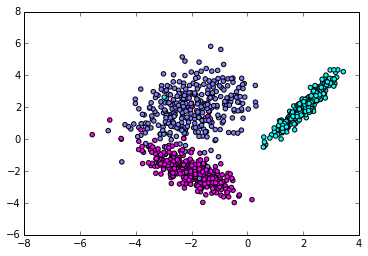

In [9]:
(easy_x, easy_y) = datasets.make_classification(n_samples=1000, n_features = 2, n_classes = 3, n_informative = 2,
                             n_redundant = 0, n_repeated = 0, n_clusters_per_class=1, class_sep=2)
scatter(easy_x[:,0], easy_x[:,1], c = easy_y, cmap = 'cool')

In [10]:
newData = dataBreaker( easy_x, easy_y )

In [11]:
# training model 1
for i in range(100):
    for j in range(newData.trainingx.shape[0]):
        prediction = model.forward(newData.trainingx[j])
        err = criterion.updateOutput(prediction, newData.trainingy[j])
        df_do = criterion.updateGradInput(prediction, newData.trainingy[j])
        grads = model.backward(df_do)
        
        for k,m in enumerate(model.modules):
            if m.gradWeight != ():
                m.W -= 1e-3 * grads[k][0]
                m.b -= 1e-3 * grads[k][1]

In [12]:
# training model 2
for i in range(100):
    for j in range(newData.trainingx.shape[0]):
        prediction2 = model2.forward(newData.trainingx[j])
        err2 = criterion2.updateOutput(prediction2, newData.trainingy[j])
        df_do2 = criterion2.updateGradInput(prediction2, newData.trainingy[j])
        grads2 = model2.backward(df_do2)
        
        for k,m in enumerate(model2.modules):
            if m.gradWeight != ():
                m.W -= 1e-3 * grads2[k][0]
                m.b -= 1e-3 * grads2[k][1]

In [13]:
errA = 0.0
errB = 0.0
for i in range(newData.validationx.shape[0]):
    predictionA = model.forward(newData.validationx[i])
    predicitonB = model2.forward(newData.validationx[i])
    errA += criterion.updateOutput(predictionA, newData.validationy[i])
    errB += criterion2.updateOutput(predicitonB, newData.validationy[i])
    
print errA
print
print errB
print

finalErr = 0

if( errA < errB ):
    for i in range(newData.testx.shape[0]):
        finalPredict = model.forward(newData.testx[i])
        finalErr += criterion.updateOutput(finalPredict, newData.testy[i])
    print "Chose Model 1"
else:
    for i in range(newData.testx.shape[0]):
        finalPredict = model2.forward(newData.testx[i])
        finalErr += criterion2.updateOutput(finalPredict, newData.testy[i])
    print "Chose Model 2"

print
print finalErr

10.2550443005

9.4160930513

Chose Model 2

15.2421102898


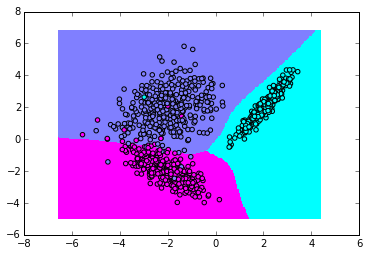

In [14]:
h = 0.05 # mesh size
x_min, x_max = easy_x[:, 0].min() - 1, easy_x[:,0].max() + 1
y_min, y_max = easy_x[:, 1].min() - 1, easy_x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = []
for pt in np.c_[xx.ravel(), yy.ravel()]:
    Z.append(model.predict(pt))
Z = np.asarray(Z)
Z = Z.reshape(xx.shape)
figure()
pcolormesh(xx,yy, Z, cmap='cool')

scatter(easy_x[:,0], easy_x[:,1], c=easy_y, cmap='cool')

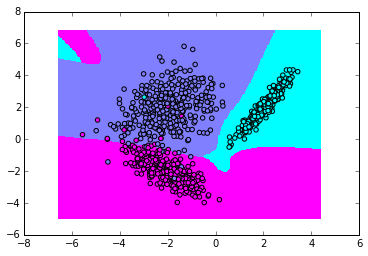

In [15]:
h = 0.05 # mesh size
x_min, x_max = easy_x[:, 0].min() - 1, easy_x[:,0].max() + 1
y_min, y_max = easy_x[:, 1].min() - 1, easy_x[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = []
for pt in np.c_[xx.ravel(), yy.ravel()]:
    Z.append(model2.predict(pt))
Z = np.asarray(Z)
Z = Z.reshape(xx.shape)
figure()
pcolormesh(xx,yy, Z, cmap='cool')

scatter(easy_x[:,0], easy_x[:,1], c=easy_y, cmap='cool')